In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [54]:
pccpdf=pd.read_csv("C:/Users/chunweil/Documents/pccp/Copy of wssc_0724.csv")

In [32]:
Group_Mnft=pccpdf.loc[:,["TotalWB","Manufacturer"]]
Group_Mnft=Group_Mnft.loc[Group_Mnft.Manufacturer!='Unknown',:]
pd.unique(Group_Mnft.Manufacturer)

array(['INTERPACE', 'Lock Joint Pipe Co.', 'PRICE BROTHERS',
       'International Pipe & Ceramics Corporation'], dtype=object)

In [23]:
#Group break by Machufacturer
break_mnft=Group_Mnft.groupby("Manufacturer").groups


In [27]:
# Extract individual groups
INTERPACE=Group_Mnft.TotalWB[break_mnft['INTERPACE']]
Lock_Joint_Pipe_Co=Group_Mnft.TotalWB[break_mnft['Lock Joint Pipe Co.']]
PRICE_BROTHERS=Group_Mnft.TotalWB[break_mnft['PRICE BROTHERS']]
International_Pipe_Ceramics_Co=Group_Mnft.TotalWB[break_mnft['International Pipe & Ceramics Corporation']]



In [28]:
# Perform the ANOVA
# the test output yields an F-statistic of 15.94 and a small p-value 
# indicating there is siginificant difference between the means of each group
stats.f_oneway(INTERPACE,Lock_Joint_Pipe_Co,PRICE_BROTHERS,International_Pipe_Ceramics_Co)

F_onewayResult(statistic=15.936429912706458, pvalue=2.4422290886414153e-10)

In [30]:
# one post-hoc test is to perform a seperate t-test for each pair of groups
# we perform a t-test between all pairs using by running each pair 

# get all manufacturer pairs
Manufacturer=[]
mnft=['INTERPACE',"Lock Joint Pipe Co.","PRICE BROTHERS","International Pipe & Ceramics Corporation"]
for mnft1 in range(3):
    for mnft2  in range(mnft1+1,4):
        Manufacturer.append((mnft[mnft1], mnft[mnft2]))

# Conduct t-test on each pair
for mnft1, mnft2 in Manufacturer: 
    print(mnft1, mnft2)
    print(stats.ttest_ind(Group_Mnft.TotalWB[break_mnft[mnft1]], 
                          Group_Mnft.TotalWB[break_mnft[mnft2]]))  


('INTERPACE', 'Lock Joint Pipe Co.')
Ttest_indResult(statistic=0.054379974012777707, pvalue=0.9566333458433659)
('INTERPACE', 'PRICE BROTHERS')
Ttest_indResult(statistic=2.8958802715556082, pvalue=0.003793343494257361)
('INTERPACE', 'International Pipe & Ceramics Corporation')
Ttest_indResult(statistic=-5.5841209048610496, pvalue=2.4441017900565008e-08)
('Lock Joint Pipe Co.', 'PRICE BROTHERS')
Ttest_indResult(statistic=3.2823214045697324, pvalue=0.0010353902137304144)
('Lock Joint Pipe Co.', 'International Pipe & Ceramics Corporation')
Ttest_indResult(statistic=-6.2461026302605962, pvalue=4.5006658937799392e-10)
('PRICE BROTHERS', 'International Pipe & Ceramics Corporation')
Ttest_indResult(statistic=-5.4403058904831969, pvalue=7.5966825100354103e-08)


In [33]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=Group_Mnft.TotalWB,     # Data
                          groups=Group_Mnft.Manufacturer,   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()              # See test summary

group1,group2,meandiff,lower,upper,reject
INTERPACE,International Pipe & Ceramics Corporation,2.2578,1.3056,3.2101,True
INTERPACE,Lock Joint Pipe Co.,-0.0056,-0.2765,0.2652,False
INTERPACE,PRICE BROTHERS,-0.889,-1.6615,-0.1165,True
International Pipe & Ceramics Corporation,Lock Joint Pipe Co.,-2.2635,-3.2176,-1.3094,True
International Pipe & Ceramics Corporation,PRICE BROTHERS,-3.1468,-4.3442,-1.9495,True
Lock Joint Pipe Co.,PRICE BROTHERS,-0.8833,-1.658,-0.1086,True


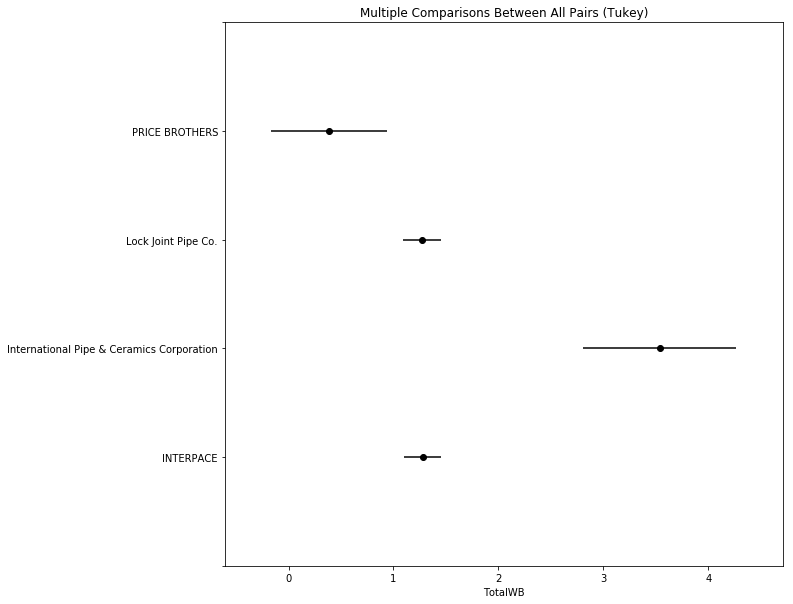

In [44]:
tukey.plot_simultaneous(figsize=(10,10),xlabel="TotalWB")    # Plot group confidence intervals



In [ ]:
# source:http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html

In [56]:
# One-Way ANOVA for Wireclass

Group_wireclass=pccpdf.loc[:,["TotalWB","WireClass"]]
Group_wireclass=Group_wireclass.loc[Group_wireclass.WireClass!='Unknown',:]
pd.unique(Group_wireclass.WireClass)

array(['III', 'II', 'IV', 'I'], dtype=object)

In [58]:
#Group break by WireClass
break_class=Group_wireclass.groupby("WireClass").groups
# Extract individual groups
IV=Group_wireclass.TotalWB[break_class['IV']]
III=Group_wireclass.TotalWB[break_class['III']]
II=Group_wireclass.TotalWB[break_class['II']]
I=Group_wireclass.TotalWB[break_class['I']]

In [59]:
# Perform the ANOVA
# the test output yields an F-statistic of 41.97 and a small p-value 
# indicating there is siginificant difference between the means of each group
stats.f_oneway(IV,III,II,I)

F_onewayResult(statistic=41.975184355309707, pvalue=5.0765028714002113e-27)

In [63]:
Wireclass=[]
wclass=["IV","III","II","I"]
for wclass1 in range(3):
    for wclass2  in range(wclass1+1,4):
        Wireclass.append((wclass[wclass1], wclass[wclass2]))



In [64]:
# Conduct t-test on each pair
for wclass1, wclass2 in Wireclass: 
    print(wclass1, wclass2)
    print(stats.ttest_ind(Group_wireclass.TotalWB[break_class[wclass1]], 
                          Group_wireclass.TotalWB[break_class[wclass2]]))  

('IV', 'III')
Ttest_indResult(statistic=6.9350254457534222, pvalue=5.2420338340763958e-12)
('IV', 'II')
Ttest_indResult(statistic=10.223183366957151, pvalue=1.8494801934645191e-24)
('IV', 'I')
Ttest_indResult(statistic=2.6362121931684235, pvalue=0.0085017678179272124)
('III', 'II')
Ttest_indResult(statistic=-3.1031953363750024, pvalue=0.0019176207417413423)
('III', 'I')
Ttest_indResult(statistic=1.2049882287106992, pvalue=0.22840022558605727)
('II', 'I')
Ttest_indResult(statistic=1.8437785538287801, pvalue=0.065234479931340364)


In [67]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey2 = pairwise_tukeyhsd(endog=Group_wireclass.TotalWB,     # Data
                          groups=Group_wireclass.WireClass,   # Groups
                          alpha=0.05)
tukey2.summary()

group1,group2,meandiff,lower,upper,reject
I,II,1.0074,-0.5338,2.5486,False
I,III,0.4751,-1.1305,2.0808,False
I,IV,3.3517,1.7192,4.9843,True
II,III,-0.5323,-1.0242,-0.0404,True
II,IV,2.3443,1.7706,2.9181,True
III,IV,2.8766,2.1473,3.6059,True


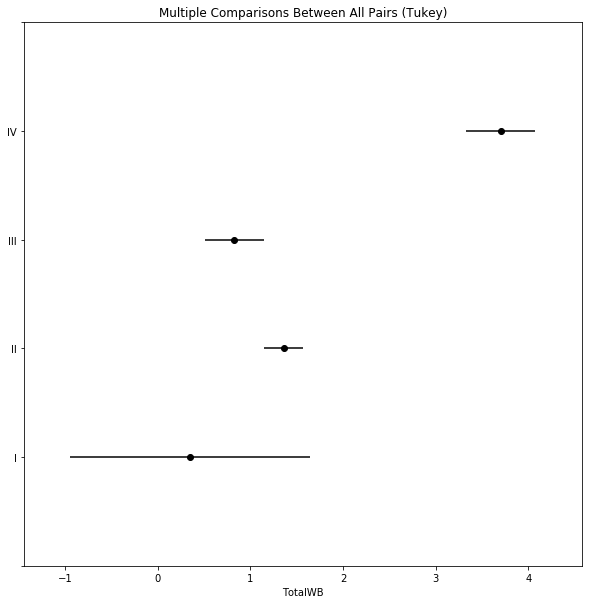

In [68]:
tukey2.plot_simultaneous(figsize=(10,10),xlabel="TotalWB")